# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [454]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [455]:
# Import du dataframe "data.csv"
df = pd.read_csv('data.csv', decimal =',')

'''voir les 10 premieres lignes du dataframe'''
df.head(10)


,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse


In [338]:
#type de chaque colonne 
print(df.dtypes)
'''Toutes les variables de ce dataframe sont de type String sauf la variable Ville qui est un float, en outre il contient des valeurs manquantes'''

Entreprise       object
Metier           object
Technologies     object
Diplome          object
Experience      float64
Ville            object
dtype: object


In [339]:
#informations sur les données 
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
Entreprise      9565 non-null object
Metier          9563 non-null object
Technologies    9582 non-null object
Diplome         9582 non-null object
Experience      9488 non-null float64
Ville           9582 non-null object
dtypes: float64(1), object(5)
memory usage: 449.3+ KB
None


In [389]:
#description des données
print(df['Experience'].describe())


print(df.describe())


count    9488.000000
mean        2.814186
std         2.716293
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        21.000000
Name: Experience, dtype: float64


### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [337]:
# Le nombre d'observations et colonnes dans le dataset
dimension = df.shape

print(f'Ce dataframe contient {dimension[0]} observations et {dimension[1]} colonnes')


# je verifie si les colonnes contiennent des valeurs manquantes
'''True Si la colonne comporte des lignes avec des NA et False sinon'''
val_NA = df.isnull().any() 
#print(val_NA)

# Le nombre de valeurs manquantes dans chaque colonnes
nber_NA_by_col = df.isnull().sum()

cols = ['Entreprise','Metier','Technologies','Diplome', 'Experience', 'Ville' ]


for i in range(len(nber_NA_by_col)):
    print(f'La colonne {cols[i]} contient {nber_NA_by_col[i]} valeurs manquantes ')

print(nber_NA_by_col)

# les colonnes Ville, Diplome, et Technologies ne contiennent pas de valeurs manquantes 
# Cependant les colonnes Entreprise , Metier Experience contiennent respectivement 17, 19 et 94 valeurs manquantes

# nbre total 
df.isnull().sum().sum()


Ce dataframe contient 9582 observations et 6 colonnes
La colonne Entreprise contient 17 valeurs manquantes 
La colonne Metier contient 19 valeurs manquantes 
La colonne Technologies contient 0 valeurs manquantes 
La colonne Diplome contient 0 valeurs manquantes 
La colonne Experience contient 94 valeurs manquantes 
La colonne Ville contient 0 valeurs manquantes 
Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64


130

### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [259]:

mediane = df[df['Metier']=='Data scientist']['Experience'].median()
df['Experience'].fillna(mediane, inplace=True)
print(mediane)





moyenne  = round( df[df['Metier']=='Data engineer']['Experience'].mean(), 2)
#df_c[df_c['Metier']=='Data engineer'].fillna(moy, inplace=True)
df['Experience'].fillna(moyenne, inplace=True)


print(moyenne)


df[df['Metier']=='Data engineer'].isnull().sum()
df_c[df_c['Metier']=='Data scientist'].isnull().sum()




2.0
2.98
Data scientist         3865
Data engineer          2347
Data architecte        2123
Lead data scientist    1228
Name: Metier, dtype: int64


Metier
Data architecte        2123
Data engineer          2347
Data scientist         3865
Lead data scientist    1228
dtype: int64

### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [393]:
#print(pd.value_counts(df['Metier']))

df.groupby(by='Metier').size()






Metier
Data architecte        2123
Data engineer          2347
Data scientist         3865
Lead data scientist    1228
dtype: int64

In [399]:
moy_experience_par_metier = round( df.groupby(by='Metier')['Experience'].mean(), 2)

print( f'Experience moyenne pour chaque profil: {moy_experience_par_metier}')



# une liste de dictionnaire 

#liste_metier =['Data scientist', 'Data engineer', 'Data architecte', 'Lead data scientist']

#for i  in range(len(moy_experience_par_metier)):
#    print(50*"=")
 #   print(f"Experience moyenne pour le {df['Metier'][i]} --> {moy_experience_par_metier[i]}")



Experience moyenne pour chaque profil: Metier
Data architecte        3.00
Data engineer          2.98
Data scientist         2.24
Lead data scientist    3.97
Name: Experience, dtype: float64


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

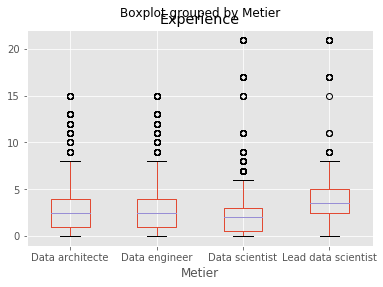

In [428]:

df.boxplot(column='Experience',by='Metier')




In [431]:

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif



# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)


In [435]:
df1 = df.copy()

df1['Experience'].fillna(0, inplace=True)
df1['Entreprise'].fillna(0, inplace=True)
df1['Metier'].fillna(0, inplace=True)

xx = df1['Experience']
yy = df1['Metier']

df1.isnull().sum()


# Create features and target
x_t = xx.values.reshape(-1, 1)
y_t= yy.values.reshape(-1, 1)



# Apply the SelectKBest object to the features and target
#X_kbest = fvalue_selector.fit_transform(x_t, y_t )


#SelectKBest(chi2, k=5).fit_transform(x_t, y_t)



### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

0           Matlab/Python/Pyspark/Scikit-learn/Tensorflow
1                               Python/Java/Scala/MongoDB
2       SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...
3                                       C/C++/Java/Python
4         Matlab/Python/C++/numpy/Tensorflow/scikit-learn
                              ...                        
9577                       C++/R/Python/Matlab/Matplotlib
9578       Excel/Python/Matlab/R/machine learning/anglais
9579                         R/machine learning/Excel/VBA
9580      Python/Pyspark/machine learning/Microsoft Azure
9581                                   VBA/Python/Excel/R
Name: Technologies, Length: 9582, dtype: object


### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

In [542]:
l =[]

techno = df['Technologies']
for i in range(len(tech)):
    v = re.split('/', techno[i], flags=re.IGNORECASE)
    for i in range(len(v)):
        l.append(v[i])

#print(l)

data_technologie = pd.Series(l).value_counts()

len(set(data_technologie))

top10 = data_technologie.iloc[0:10]

print(data_technologie)


data_technologie.index +=1
data_technologie = data_technologie.rename(columns={0:'value'}).rename_axis('doc-id')
print (data_technologie)

#[[x,l.count(x)] for x in set(l)]
#[['a', 1], ['b', 2]]
#>>> dict((x,l.count(x)) for x in set(l))
#{'a': 1, 'b': 2}

Python     6627
R          4374
SQL        2581
Java       1719
Hadoop     1589
           ... 
ORACLE       94
MySQL        94
Windows      75
Perl         74
Ruby         35
Length: 61, dtype: int64


TypeError: can only concatenate str (not "int") to str

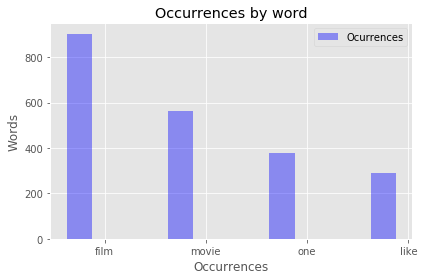

In [509]:
data = [('film', 904), ('movie', 561), ('one', 379), ('like', 292)]

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word')
plt.xticks(index + bar_width, legends_films)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
l =[]

tech = df['Technologies']
for i in range(len(tech)):
    v = re.split('/', tech[i], flags=re.IGNORECASE)
    l.append(v)
    cv =l.append(tech[i].split('/'))
    #[[x,l.count(x)] for x in set(l)]
   
#print(l)

print(pd.Series(l).value_counts())



### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

### 10) Décrire de façon détaillée les différentes étapes pour mener à bien un projet data complexe.

Dans le cadre d’une campagne de recrutement vous avez reçu un ensemble de cv qui ne sont pas à jour (le poste actuel n’est pas présent). Deux exemple de CV vous sont donnés en pièce jointe (il n'y a pas de mise en page type). Tous les CV sont au format PDF.

On souhaite connaitre le poste actuel de chaque candidat.

-  Quelles sont les différentes étapes nécessaires à la réalisation d'un tel projet?
-  Pour chaque étape, détaillez les taches à accomplir, les méthodes à suivre, les pistes possibles, les points critiques.
-  Justifiez consciencieusement vos choix
